In [ ]:
# data manipulation # data  
import numpy as np
import pandas as pd
import calendar
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [654]:
#FUNCTIONS
def make_categorical(df,col_name):
 df.loc[:,col_name]   = pd.Categorical(df[col_name])

def mem_mib(df):
    print("{0:.2f} GB".format(
        df.memory_usage().sum() / (1024 * 1024 *1024)
    ))

def month_number_to_name(df,col_name):
    df[col_name] = df[col_name].apply(lambda x: calendar.month_abbr[x])

#months = {datetime.datetime(2000,i,1).strftime("%b"): i for i in range(1, 13)}
#from time import strptime
#divvy_dataset_orig['month'].apply(lambda x: strptime(x,'%b').tm_mon)

In [655]:
#parse_dates = true to read dates automatically
divvy_dataset =pd.read_csv('Divvy/trip_id_weather/chicago-divvy-bicycle-sharing-data/data.csv',parse_dates=True)

#Make a copy of the original dataset
divvy_dataset_orig = divvy_dataset.copy()
divvy_dataset = divvy_dataset.drop_duplicates()


In [656]:
divvy_dataset.info()
mem_mib(divvy_dataset_orig)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9495188 entries, 0 to 9495234
Data columns (total 23 columns):
trip_id              int64
year                 int64
month                int64
week                 int64
day                  int64
hour                 int64
usertype             object
gender               object
starttime            object
stoptime             object
tripduration         float64
temperature          float64
events               object
from_station_id      int64
from_station_name    object
latitude_start       float64
longitude_start      float64
dpcapacity_start     float64
to_station_id        int64
to_station_name      object
latitude_end         float64
longitude_end        float64
dpcapacity_end       float64
dtypes: float64(8), int64(8), object(7)
memory usage: 1.7+ GB
1.63 GB


In [657]:
divvy_dataset.shape
#9495235 rows, 23 columns
#divvy_dataset.columns

(9495188, 23)

In [690]:
#Check for NULL values in the data frame#
divvy_dataset.isnull().values.any()
#####False

#How many NULL values in the dataset#
#print (divvy_dataset.isnull().sum())

#Replace missing values with a number#
#divvy_dataset['gender'].fillna(125, inplace=True)

True

In [659]:
#Keep the columns needed for analysis

columns_to_keep = ['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender',
       'starttime', 'stoptime', 'tripduration', 'temperature', 'events',
       'from_station_id', 'from_station_name', 'latitude_start',
       'longitude_start', 'dpcapacity_start', 'to_station_id',
       'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end']

divvy_dataset[columns_to_keep].head()
divvy_dataset.filter(columns_to_keep).head()

#EXAMPLE
#divvy_dataset = divvy_dataset.filter(regex="(trip_id|^to|^latitude | end$)")
#divvy_dataset.columns

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,...,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,...,282,Halsted St & Maxwell St,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,...,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,...,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,194,State St & Wacker Dr,41.887155,-87.627750,11.0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,...,320,Loomis St & Lexington St,41.872187,-87.661501,15.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0


In [660]:
#describe() can only be used on numeric columns
divvy_dataset.describe()

,trip_id,year,month,week,day,hour,tripduration,temperature,from_station_id,latitude_start,longitude_start,dpcapacity_start,to_station_id,latitude_end,longitude_end,dpcapacity_end
count,9.495188e+06,9.495188e+06,9.495188e+06,9.495188e+06,9.495188e+06,9.495188e+06,9.495188e+06,9.495188e+06,9.495188e+06,9.495188e+06,9.495188e+06,9.495188e+06,9.495188e+06,9.495188e+06,9.495188e+06,9.495188e+06
mean,9.861166e+06,2.015737e+03,7.161238e+00,2.938067e+01,2.687384e+00,1.362470e+01,1.144686e+01,6.299982e+01,1.799207e+02,4.190017e+01,-8.764473e+01,2.138428e+01,1.807042e+02,4.190069e+01,-8.764496e+01,2.128449e+01
std,4.680029e+06,1.075631e+00,2.708385e+00,1.177943e+01,1.890344e+00,4.858831e+00,7.206068e+00,1.720086e+01,1.217036e+02,3.467424e-02,2.175211e-02,7.644507e+00,1.221139e+02,3.494919e-02,2.181374e-02,7.595941e+00
min,1.109427e+06,2.014000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-1.500000e+01,2.000000e+00,4.173665e+01,-8.780287e+01,0.000000e+00,2.000000e+00,4.173665e+01,-8.780287e+01,0.000000e+00
25%,5.941633e+06,2.015000e+03,5.000000e+00,2.100000e+01,1.000000e+00,9.000000e+00,6.033333e+00,5.200000e+01,7.700000e+01,4.188103e+01,-8.765479e+01,1.500000e+01,7.700000e+01,4.188132e+01,-8.765549e+01,1.500000e+01
50%,1.005802e+07,2.016000e+03,7.000000e+00,3.000000e+01,3.000000e+00,1.500000e+01,9.633333e+00,6.690000e+01,1.640000e+02,4.189228e+01,-8.764107e+01,1.900000e+01,1.640000e+02,4.189384e+01,-8.764109e+01,1.900000e+01
75%,1.383261e+07,2.017000e+03,9.000000e+00,3.800000e+01,4.000000e+00,1.700000e+01,1.520000e+01,7.590000e+01,2.680000e+02,4.192008e+01,-8.763058e+01,2.300000e+01,2.730000e+02,4.192169e+01,-8.763058e+01,2.300000e+01
max,1.753670e+07,2.017000e+03,1.200000e+01,5.300000e+01,6.000000e+00,2.300000e+01,6.000000e+01,9.500000e+01,6.260000e+02,4.206431e+01,-8.754939e+01,5.500000e+01,6.260000e+02,4.206431e+01,-8.754939e+01,5.500000e+01


In [661]:
#Common Data Problems
#Inconsistent column names
#Outliers
#Duplicate rows
#Untidy
#Column types can signal unexpected data values
#Process columns

divvy_dataset.head(3)

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,month_name,months-year
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,...,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0,Jun,Jun-2014
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,...,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0,Jun,Jun-2014
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,...,41.921687,-87.653714,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0,Jun,Jun-2014


## If trip start time is greater than stop time, swap them

In [704]:
df.loc[divvy_dataset.starttime > divvy_dataset.stoptime,['starttime','stoptime']] = df.loc[divvy_dataset.starttime > divvy_dataset.stoptime,['stoptime','starttime']].values


# CALCULATIONS

## Categorical Variables Frequency Counts

In [662]:
'''
trip_id              int64   (Categorical : Ordinal)
year                 int64   (Categorical : Ordinal,Interval & Quantitative: Discrete)
month                int64   (Categorical : Ordinal,Interval & Quantitative: Discrete)
week                 int64   (Categorical : Ordinal,Interval & Quantitative: Discrete)
day                  int64   (Categorical : Ordinal,Interval & Quantitative: Discrete)
hour                 int64   (Categorical : Ordinal,Interval & Quantitative: Discrete)
usertype             object  (Categorical : Nominal)
gender               object  (Categorical : Binary)
starttime            object  (Quantitative: Continuous)
stoptime             object  (Quantitative: Continuous)
tripduration         float64 (Quantitative: Continuous)
temperature          float64 (Quantitative: Continuous)
events               object  
from_station_id      int64   (Categorical : Nominal)
from_station_name    object  (Categorical : Nominal)
latitude_start       float64 (Quantitative: Continuous)
longitude_start      float64 (Quantitative: Continuous)
dpcapacity_start     float64 (Quantitative : Discrete)
to_station_id        int64   (Categorical : Nominal)
to_station_name      object  (Categorical : Nominal)
latitude_end         float64 (Quantitative: Continuous)
longitude_end        float64 (Quantitative: Continuous)
dpcapacity_end       float64 (Quantitative: Continuous)
'''
#Frequency counts for categorical data#
#print(int(divvy_dataset.apply(pd.value_counts)))

#df.apply(pd.value_counts).fillna(0)

#Data Frame with Categorical variables frequency counts#
gender = divvy_dataset['gender'].value_counts(dropna=False)
usertype = divvy_dataset['usertype'].value_counts(dropna=False)
to_station_id = divvy_dataset['to_station_id'].value_counts(dropna=False).rename(columns={0:'count'}).head(5)
from_station_id = divvy_dataset['from_station_id'].value_counts(dropna=False).rename(columns={0:'count'}).head(5)

#gender.index = ["gender_" + str(x)  for x in gender.index]
#usertype.index = ["usertype_" + str(x)  for x in usertype.index]
#to_station_id.index = ["to_station_" + str(x)  for x in to_station_id.index]
#from_station_id.index = ["from_station_" + str(x)  for x in from_station_id.index]
pd.concat([gender, usertype,to_station_id,from_station_id]
          , axis=0
          , join='outer'
          ,keys=['gender', 'usertype','to_station_id','from_station_id']
          ,names=['Category', 'Sub Category           Frequency Count'])



Category         Sub Category           Frequency Count
gender           Male                                      7116528
                 Female                                    2378660
usertype         Subscriber                                9493733
                 Customer                                     1277
                 Dependent                                     178
to_station_id    91                                         161152
                 192                                        139654
                 174                                        129632
                 77                                         117378
                 287                                         90546
from_station_id  91                                         164669
                 192                                        140197
                 77                                         122229
                 174                                        121727
      

## Add name of the month using integer values

In [ ]:
#Remove all rows with missing values. axis =0 is the default 
divvy_dataset = divvy_dataset.dropna(subset=['trip_id'], how="all", axis=0)
divvy_dataset['month_name'] = divvy_dataset['month'].map(months)
divvy_dataset['months-year'] = divvy_dataset.reset_index().apply(lambda x: '{}-{}'.format(x['month_name'],x['year']),axis=1)
#divvy_dataset['month-year'] = divvy_dataset.reset_index().apply(lambda x: '{}-{}'.format(x['months'],x['year']),axis=1)

## Group start and end station's capacity 

In [689]:
#Convert an existing Series or column to a category dtype:
divvy_dataset['gender'].astype('category')

int(divvy_dataset.dpcapacity_start.max())
##### 55

labels = ["{0} - {1}".format(i, i + 9) for i in range(int(divvy_dataset.dpcapacity_start.min()), int(divvy_dataset.dpcapacity_start.max())*2, 10)]

#divvy_dataset['group'] = pd.cut(divvy_dataset.dpcapacity_start, range(int(divvy_dataset.dpcapacity_start.min()), int(divvy_dataset.dpcapacity_start.max()), 10), right=False, labels=labels)
divvy_dataset['start_station_group'] = pd.cut(divvy_dataset.dpcapacity_start, range(0, 120, 10), right=False, labels=labels)
divvy_dataset.head()

divvy_dataset['end_station_group'] = pd.cut(divvy_dataset.dpcapacity_end, range(0, 120, 10), right=False, labels=labels)
divvy_dataset.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,to_station_name,latitude_end,longitude_end,dpcapacity_end,month_name,months-year,group,duration,start_station_group,end_station_group
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,...,Broadway & Cornelia Ave,41.945512,-87.645980,15.0,Jun,Jun-2014,10 - 19,10.0,10 - 19,10 - 19
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,...,May St & Taylor St,41.869482,-87.655486,15.0,Jun,Jun-2014,10 - 19,4.0,10 - 19,10 - 19
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,...,Halsted St & Dickens Ave,41.919936,-87.648830,15.0,Jun,Jun-2014,10 - 19,2.0,10 - 19,10 - 19
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,...,State St & Wacker Dr,41.887155,-87.627750,11.0,Jun,Jun-2014,10 - 19,58.0,10 - 19,10 - 19
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,...,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,Jun,Jun-2014,10 - 19,10.0,10 - 19,10 - 19


## Calculate Trip Duration 

In [688]:
divvy_dataset.stoptime=pd.to_datetime(divvy_dataset.stoptime)
divvy_dataset.starttime=pd.to_datetime(divvy_dataset.starttime)
divvy_dataset['duration'] = ((divvy_dataset['stoptime'] - divvy_dataset['starttime']).dt.total_seconds())/60

In [665]:
divvy_dataset.set_index(['gender','usertype','year']).head(4)

trip_id  month  week  day  hour            starttime  \
gender usertype   year                                                         
Male   Subscriber 2014  2355134      6    27    0    23  2014-06-30 23:57:00   
                  2014  2355133      6    27    0    23  2014-06-30 23:56:00   
                  2014  2355130      6    27    0    23  2014-06-30 23:33:00   
Female Subscriber 2014  2355129      6    27    0    23  2014-06-30 23:26:00   

                                   stoptime  tripduration  temperature  \
gender usertype   year                                                   
Male   Subscriber 2014  2014-07-01 00:07:00     10.066667         68.0   
                  2014  2014-07-01 00:00:00      4.383333         68.0   
                  2014  2014-06-30 23:35:00      2.100000         68.0   
Female Subscriber 2014  2014-07-01 00:24:00     58.016667         68.0   

                         events   ...     longitude_start dpcapacity_start  \
gender usertype   year            ...                                        
Male   Subscriber 2014  tstorms   ...          -87.668385             15.0   
                  2014  tstorms   ...          -87.646930             15.0   
                  2014  tstorms   ...          -87.653714             19.0   
Female Subscriber 2014  tstorms   ...          -87.649633             19.0   

                        to_station_id           to_station_name  latitude_end  \
gender usertype   year                                                          
Male   Subscriber 2014            303   Broadway & Cornelia Ave     41.945512   
                  2014             22        May St & Taylor St     41.869482   
                  2014            225  Halsted St & Dickens Ave     41.919936   
Female Subscriber 2014            194      State St & Wacker Dr     41.887155   

                        longitude_end dpcapacity_end  month_name  months-year  \
gender usertype   year                                                          
Male   Subscriber 2014     -87.645980           15.0         Jun     Jun-2014   
                  2014     -87.655486           15.0         Jun     Jun-2014   
                  2014     -87.648830           15.0         Jun     Jun-2014   
Female Subscriber 2014     -87.627750           11.0         Jun     Jun-2014   

                          group  
gender usertype   year           
Male   Subscriber 2014  10 - 19  
                  2014  10 - 19  
                  2014  10 - 19  
Female Subscriber 2014  10 - 19  

[4 rows x 23 columns]

In [666]:
#To Str
#df.column_name = df.column_name.astype(str)

#To int:
#df.column_name = df.column_name.astype(np.int64)


#Number of trips by month
trips_by_usertype_per_month = divvy_dataset.trip_id \
    .groupby([divvy_dataset.year,divvy_dataset.month,divvy_dataset.usertype]) \
    .size().reset_index() \
    .rename(columns={0:'count'}) \
    .sort_index() 

####### ASK MENTOR: How to sort month names  #######
#trips_by_usertype_per_month['month_name']=trips_by_usertype_per_month.month.apply(lambda x: calendar.month_abbr[x])
#trips_by_usertype_per_month = trips_by_usertype_per_month.pivot(index='usertype',columns='month_name',values='trip_id')
months = {1: 'Jan', 2: 'Feb', 3: 'Mar',4: 'Apr',5:'May',6: 'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12: 'Dec'}
trips_by_usertype_per_month['months'] = trips_by_usertype_per_month['month'].map(months)
trips_by_usertype_per_month = trips_by_usertype_per_month.pivot_table(index='usertype',columns=['year','month','months'],values='trip_id')


#trips_by_usertype_per_month
#MultiIndex(levels=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']],
#           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2]],
#           names=['month', 'months'])

## Divvy Usage By Year

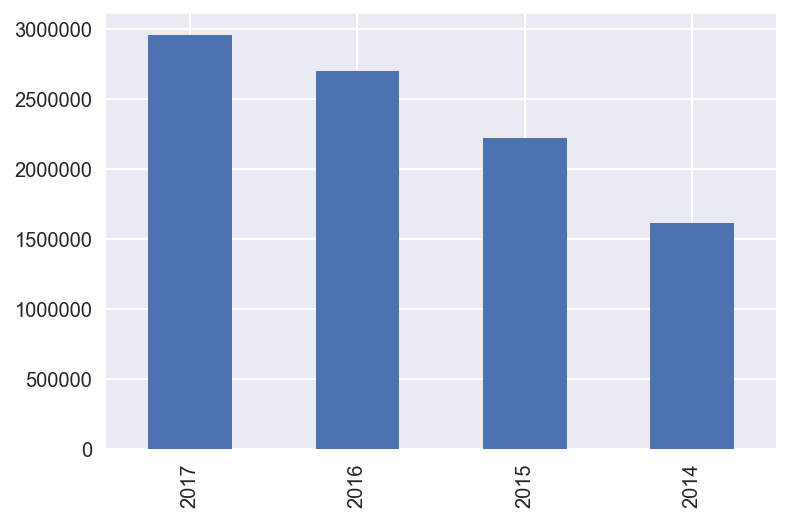

In [668]:
divvy_dataset.year = divvy_dataset.year.astype('category')
year_counts = divvy_dataset['year'].value_counts()

plt.figure();

year_counts.plot(kind='bar');

## Highest usage of Divvy by months and user type for all the 4 years

In [669]:
cm = sns.light_palette("green", as_cmap=True)
s = trips_by_usertype_per_month.style.background_gradient(cmap=cm)
s


/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


## How has subscribers performed over the years ?

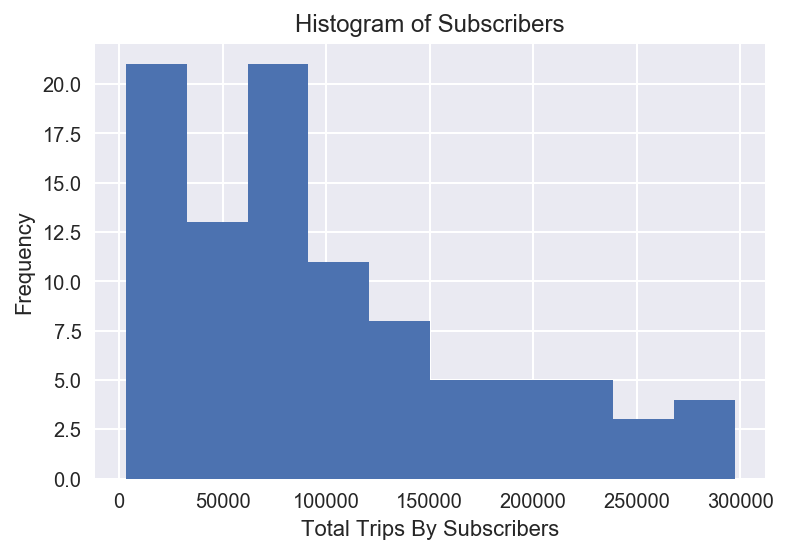

In [670]:
subscriber_df=divvy_dataset.loc[(divvy_dataset.usertype == 'Subscriber'),['months-year','gender']]\
                  .groupby(['months-year','gender'])\
                  .size() 

        #####Errors out when a list is provided to loc to get a dataframe instead of series   
#type(subscriber_df)
#### pandas.core.series.Series

#isinstance(subscriber_df, pd.DataFrame)
#### False

# subscriber_df is a multilevel index
# subscriber_df.index
subscriber_df.unstack(level =0)

subscriber_df.plot(kind='hist')
plt.title("Histogram of Subscribers")
plt.xlabel("Total Trips By Subscribers")
plt.ylabel("Frequency");
plt.show()

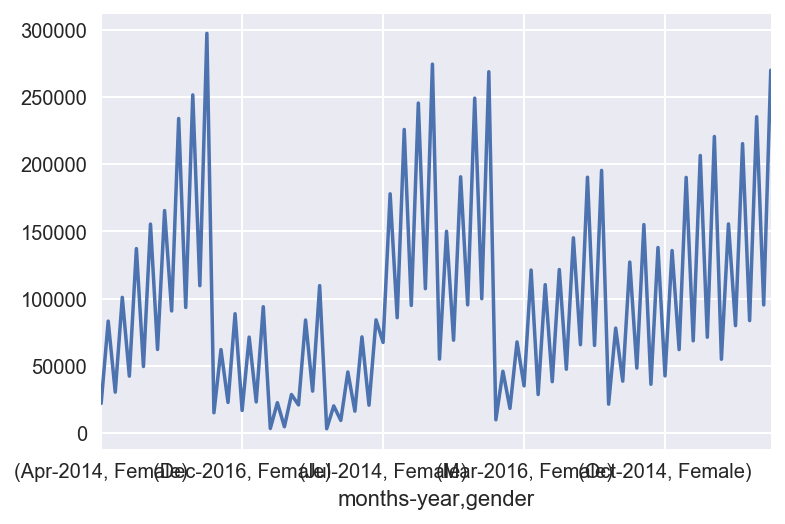

In [671]:
subscriber_df.cumsum()
subscriber_df.plot();

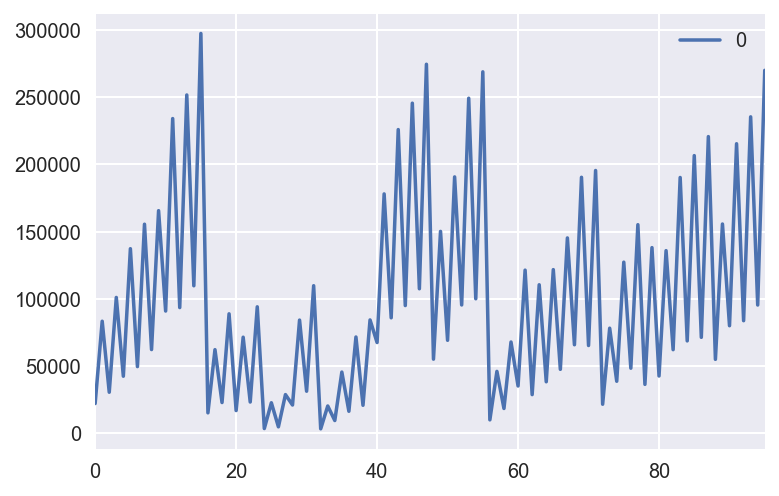

In [672]:
plot_df = subscriber_df.to_frame().reset_index()
plot_df.unstack(level=-1)
plot_df.cumsum()
plot_df.plot()
#type(plot_df)
#pandas.core.frame.DataFrame

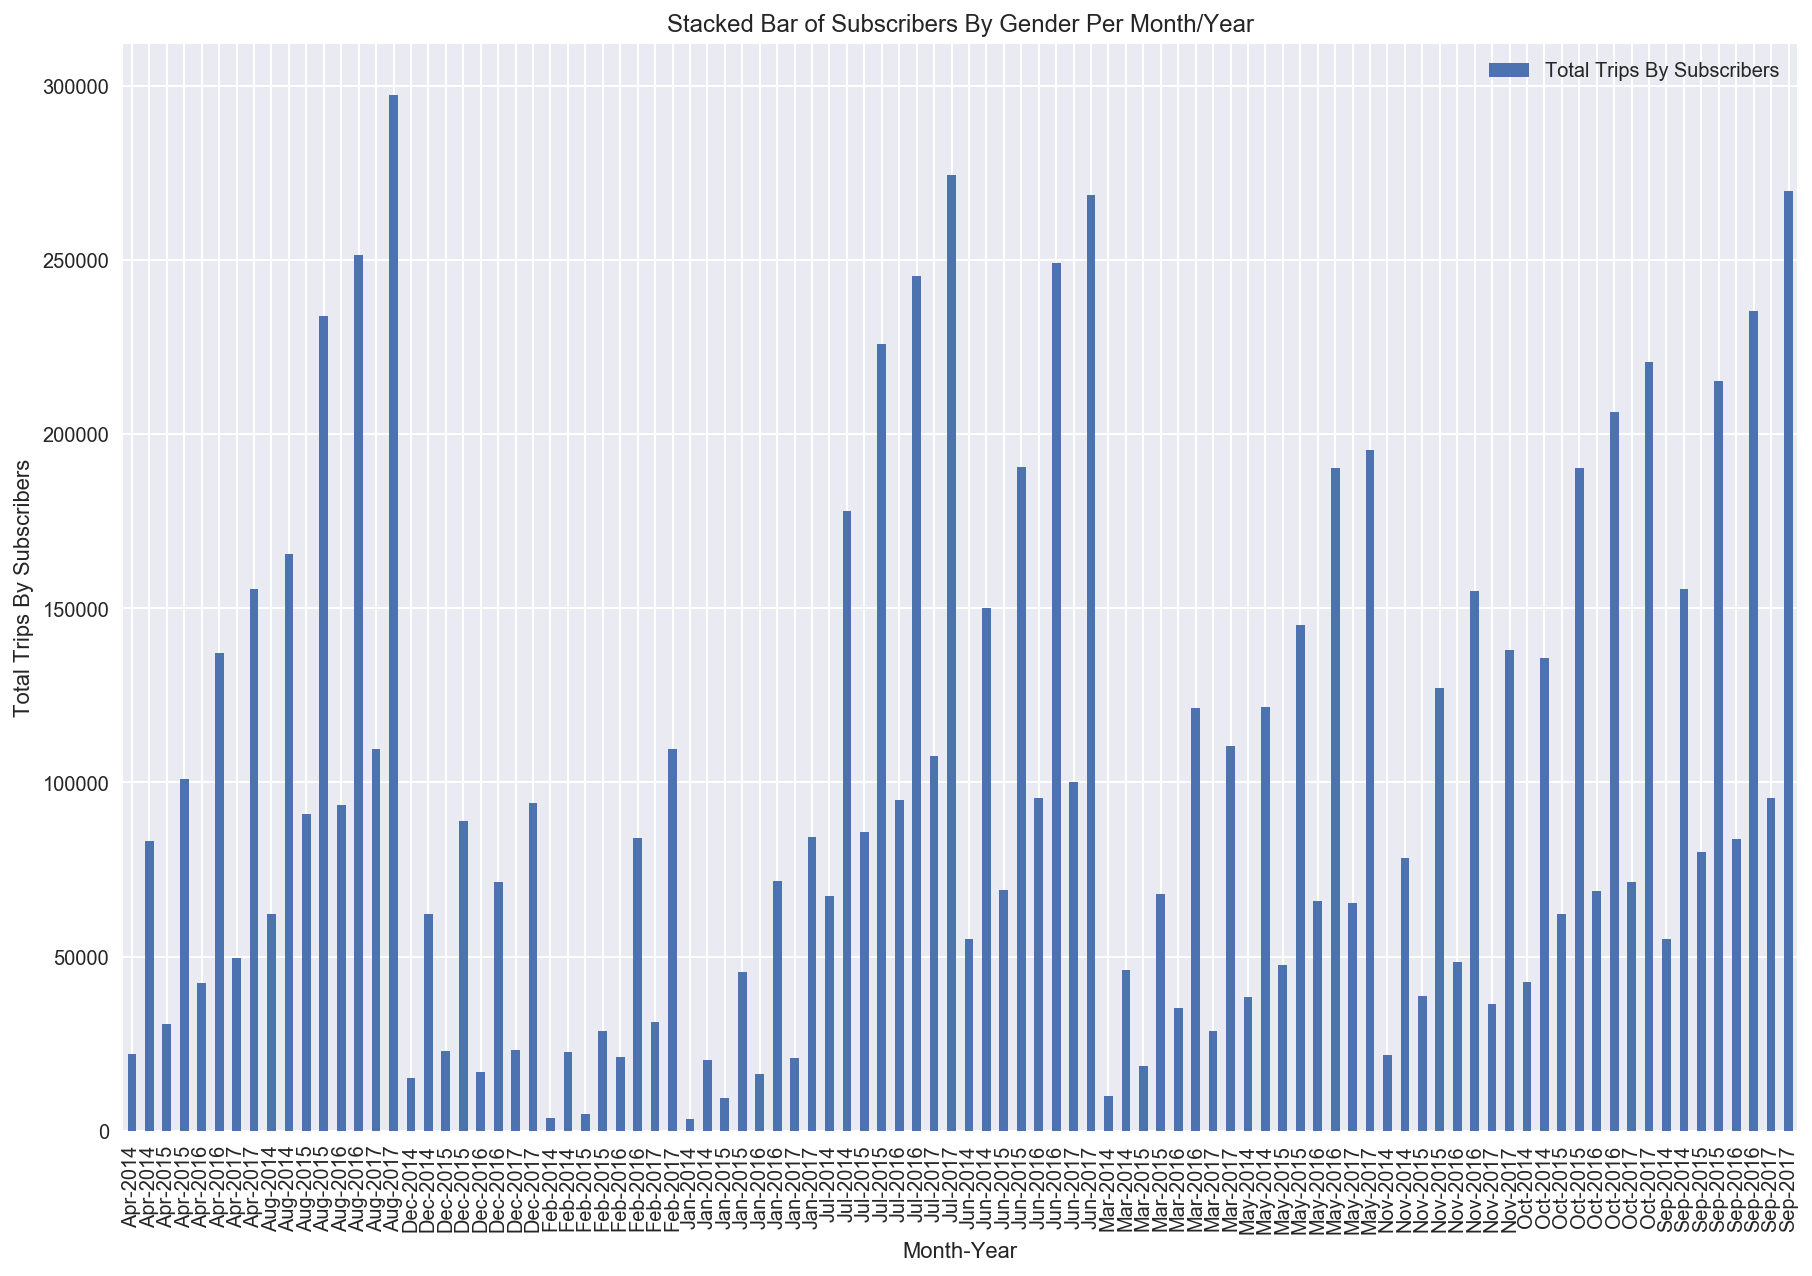

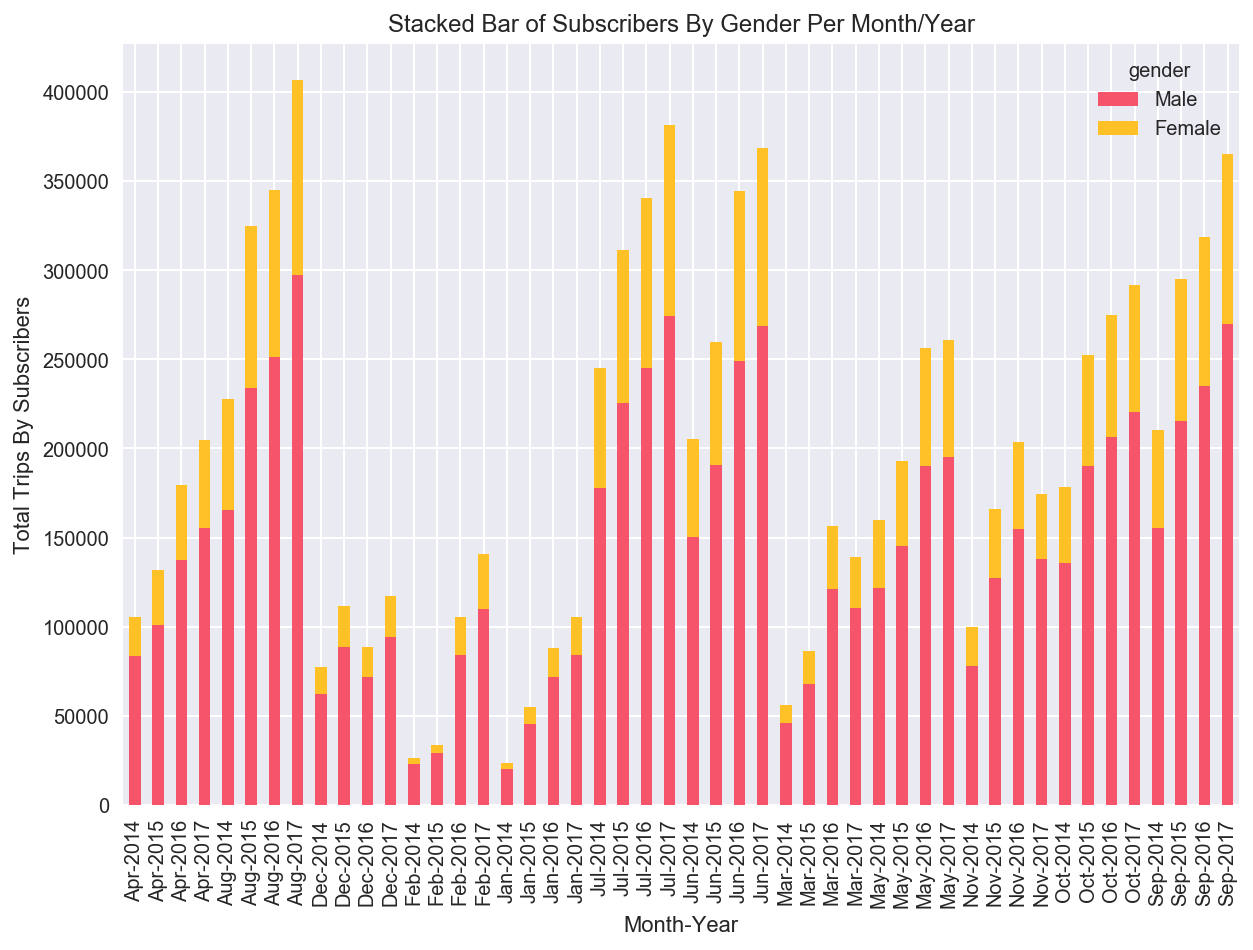

In [673]:
plt.rcParams["figure.figsize"] = (15,10)
plot_df.columns=['months-year', 'gender', 'Total Trips By Subscribers']
colors = ["#f6546a", "#ffc125"]

plot_df[['Total Trips By Subscribers']].plot(kind='bar'
                                              ,stacked=True
                                              ,x=plot_df['months-year']
                                              ,use_index='Total Trips By Subscribers')
plt.title("Stacked Bar of Subscribers By Gender Per Month/Year")
plt.xlabel("Month-Year")
plt.ylabel("Total Trips By Subscribers");

pivot_df = plot_df.pivot(columns='gender', index='months-year', values='Total Trips By Subscribers')
pivot_df.loc[:,['Male','Female']].plot.bar(stacked=True, color=colors, figsize=(10,7))
plt.title("Stacked Bar of Subscribers By Gender Per Month/Year")
plt.xlabel("Month-Year")
plt.ylabel("Total Trips By Subscribers");

#plot_df.plot(kind='bar', stacked=True)

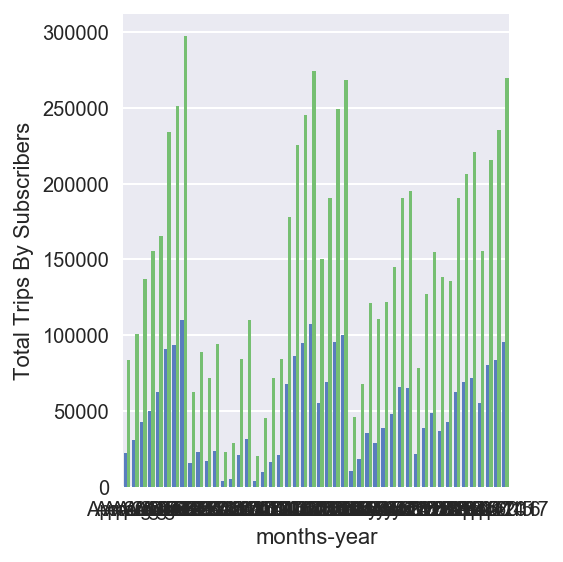

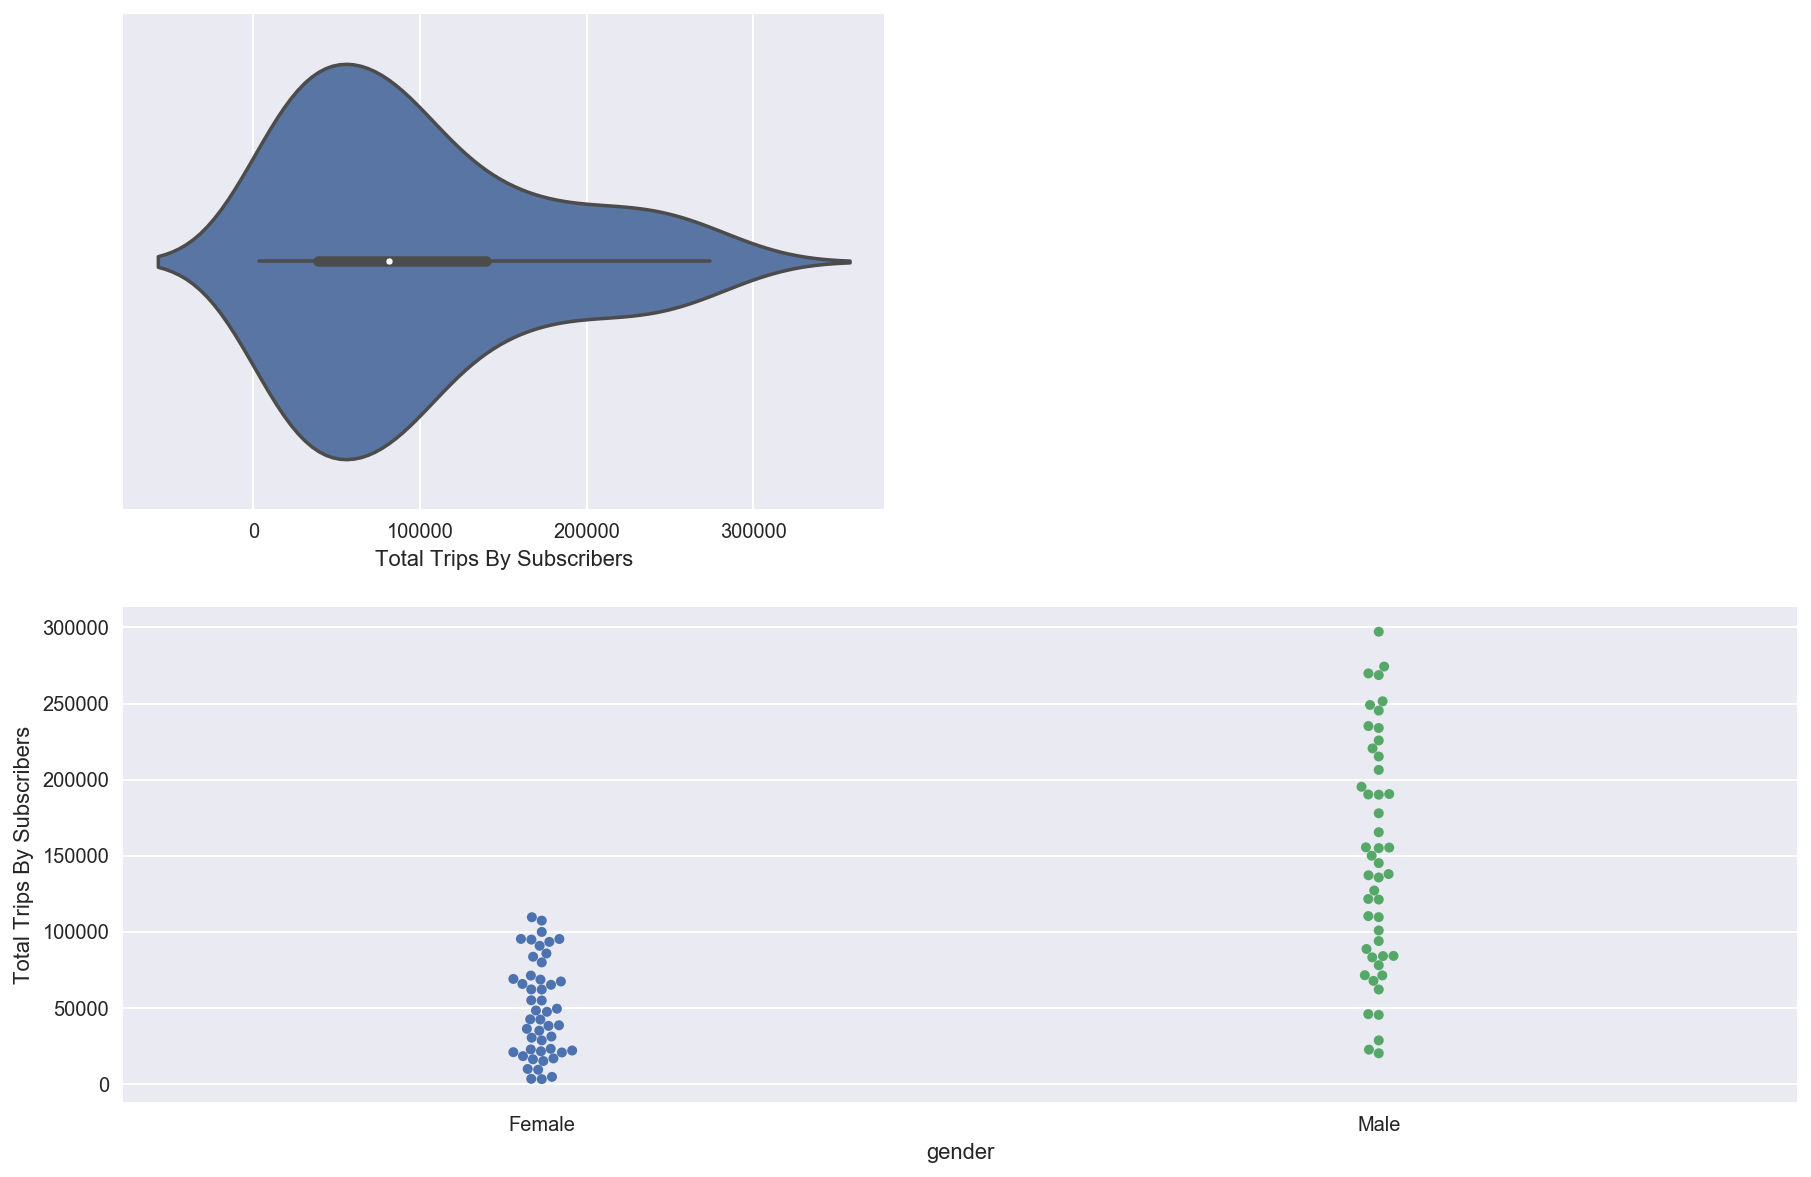

In [680]:
plt.figure(figsize=(20,15))
sns.factorplot("months-year", "Total Trips By Subscribers","gender", data=plot_df, kind="bar", palette="muted", legend=False)
plt.show()

plt.subplot(212)
sns.swarmplot(x="gender", y="Total Trips By Subscribers", data=plot_df)

plt.subplot(221)
sns.violinplot(x = "Total Trips By Subscribers", data=plot_df)

## TIMESERIES

In [691]:
df = divvy_dataset
df['DayOfWeek'] = df['starttime'].apply(lambda d: d.dayofweek)
df['DayName'] = df['starttime'].apply(lambda d: d.weekday_name)
df['DayOfYear'] = df['starttime'].apply(lambda d: d.dayofyear)
df['WeekOfYear'] = df['starttime'].apply(lambda d: d.weekofyear)
df['Quarter'] = df['starttime'].apply(lambda d: d.quarter)

In [695]:
divvy_dataset['duration'].sort_values(ascending=False).head(5)

3933122    99.0
1690174    82.0
3933115    81.0
518086     80.0
3933118    80.0
Name: duration, dtype: float64

In [706]:
divvy_dataset['events'].unique()

array(['tstorms', 'rain or snow', 'cloudy', 'not clear', 'clear', 'unknown'], dtype=object)

## Plot timeseries data based on the weather events